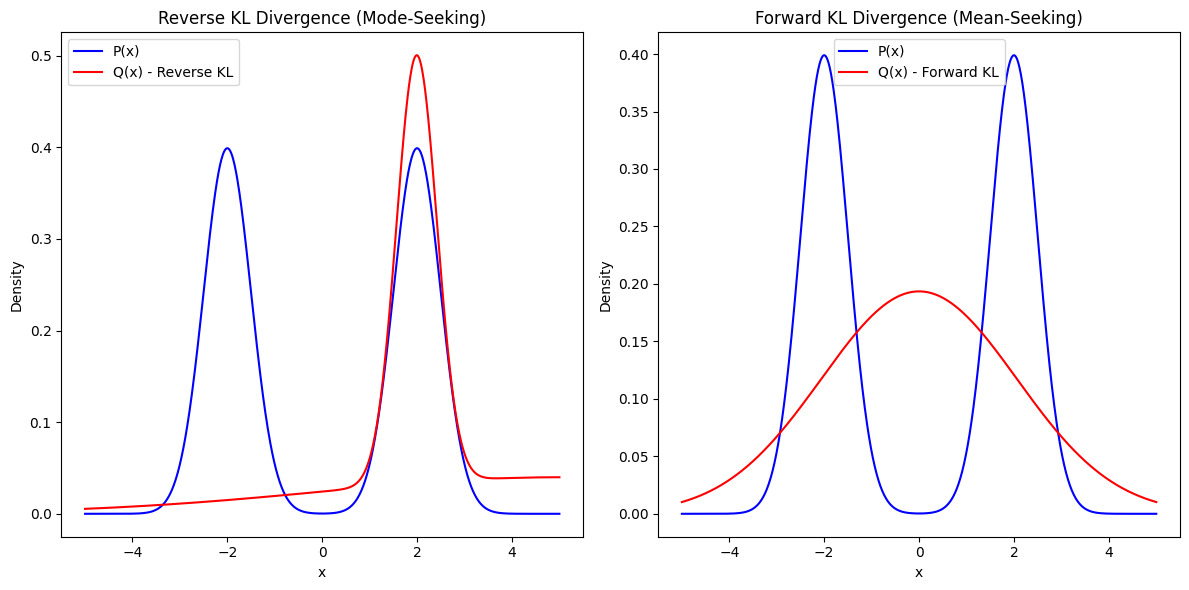

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm

# Define the multimodal distribution P (mixture of Gaussians)
def P(x):
    return 0.5 * norm.pdf(x, -2, 0.5) + 0.5 * norm.pdf(x, 2, 0.5)

# Define the unimodal distribution Q (single Gaussian)
def Q_single(x, mu, sigma):
    return norm.pdf(x, mu, sigma)

# Define the unimodal distribution Q (mixture of Gaussians for reverse KL)
def Q_mixture(x, mu1, sigma1, mu2, sigma2):
    return 0.5 * norm.pdf(x, mu1, sigma1) + 0.5 * norm.pdf(x, mu2, sigma2)

# KL divergence calculations
def kl_reverse(Q_params):
    mu1, sigma1, mu2, sigma2 = Q_params
    return np.sum(Q_mixture(x, mu1, sigma1, mu2, sigma2) *
                  np.log(Q_mixture(x, mu1, sigma1, mu2, sigma2) / P(x)))

def kl_forward(Q_params):
    mu, sigma = Q_params
    return np.sum(P(x) *
                  np.log(P(x) / Q_single(x, mu, sigma)))

# Initial parameters for Q
initial_mu_single = 0
initial_sigma_single = 1
initial_mu_mixture = [-2, 2]  # starting with modes of P
initial_sigma_mixture = [0.5, 0.5]

# Set up x range for calculations
x = np.linspace(-5, 5, 1000)

# Minimize reverse KL divergence using a mixture of Gaussians for Q
result_reverse = minimize(kl_reverse, initial_mu_mixture + initial_sigma_mixture,
                          bounds=[(-5, 5), (0.01, 5), (-5, 5), (0.01, 5)])
optimal_params_reverse = result_reverse.x

# Minimize forward KL divergence using a single Gaussian for Q
result_forward = minimize(kl_forward, [initial_mu_single, initial_sigma_single],
                          bounds=[(-5, 5), (0.01, 5)])
optimal_mu_forward, optimal_sigma_forward = result_forward.x

# Generate plots
plt.figure(figsize=(12, 6))

# Plot for reverse KL
plt.subplot(1, 2, 1)
plt.plot(x, P(x), label='P(x)', color='blue')
plt.plot(x, Q_mixture(x, *optimal_params_reverse), label='Q(x) - Reverse KL', color='red')
plt.title('Reverse KL Divergence (Mode-Seeking)')
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')

# Plot for forward KL
plt.subplot(1, 2, 2)
plt.plot(x, P(x), label='P(x)', color='blue')
plt.plot(x, Q_single(x, optimal_mu_forward, optimal_sigma_forward), label='Q(x) - Forward KL', color='red')
plt.title('Forward KL Divergence (Mean-Seeking)')
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')

# Save plots
plt.tight_layout()
plt.savefig('kl_divergence_mode_mean_seeking.png')
plt.show()
